# TP - ApA
## Autores:
* Joaquín Gomez Codino
* Matías Herreros

In [31]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

### Carga de datos

#### ¿Cuántas filas y columnas tiene el dataset?

In [32]:
weather = pd.read_csv('./dataset/weatherAUS.csv')
rows, columns = weather.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 145460, Columns: 23


#### ¿Qué atributos presenta el dataset y qué describen? ¿Qué tipos de datos tiene cada atributo?

In [33]:
attributes = weather.dtypes
attributes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


1. **Date**: `object` - La fecha de la observación.
2. **Location**: `object` - La ubicación donde se realizó la observación.
3. **MinTemp**: `float64` - La temperatura mínima del día en grados Celsius.
4. **MaxTemp**: `float64` - La temperatura máxima del día en grados Celsius.
5. **Rainfall**: `float64` - La cantidad de lluvia registrada en milímetros.
6. **Evaporation**: `float64` - La cantidad de evaporación en milímetros.
7. **Sunshine**: `float64` - La cantidad de horas de sol.
8. **WindGustDir**: `object` - La dirección del viento más fuerte registrado.
9. **WindGustSpeed**: `float64` - La velocidad del viento más fuerte registrado en km/h.
10. **WindDir9am**: `object` - La dirección del viento a las 9 AM.
11. **WindDir3pm**: `object` - La dirección del viento a las 3 PM.
12. **WindSpeed9am**: `float64` - La velocidad del viento a las 9 AM en km/h.
13. **WindSpeed3pm**: `float64` - La velocidad del viento a las 3 PM en km/h.
14. **Humidity9am**: `float64` - La humedad relativa a las 9 AM en porcentaje.
15. **Humidity3pm**: `float64` - La humedad relativa a las 3 PM en porcentaje.
16. **Pressure9am**: `float64` - La presión atmosférica a las 9 AM en hPa.
17. **Pressure3pm**: `float64` - La presión atmosférica a las 3 PM en hPa.
18. **Cloud9am**: `float64` - La cantidad de nubosidad a las 9 AM (medida en octavos).
19. **Cloud3pm**: `float64` - La cantidad de nubosidad a las 3 PM (medida en octavos).
20. **Temp9am**: `float64` - La temperatura a las 9 AM en grados Celsius.
21. **Temp3pm**: `float64` - La temperatura a las 3 PM en grados Celsius.
22. **RainToday**: `object` - Indicador de si llovió o no hoy (Yes/No).
23. **RainTomorrow**: `object` - Indicador de si lloverá o no mañana (Yes/No).

#### Verifica la consistencia de los tipos de datos y realizar conversiones si es necesario.

##### Algunos tipos de datos no son consistentes con lo que describen. A continuacion se cambiaran para que lo sean:

In [34]:
weather['Date'] = pd.to_datetime(weather['Date'], errors='coerce')
weather['Location'] = weather['Location'].astype(str)
weather['WindGustDir'] = weather['WindGustDir'].astype(str)
weather['WindDir9am'] = weather['WindDir9am'].astype(str)
weather['WindDir3pm'] = weather['WindDir3pm'].astype(str)
weather['RainToday'] = weather['RainToday'].map({'Yes': True, 'No': False})
weather['RainTomorrow'] = weather['RainTomorrow'].map({'Yes': True, 'No': False})
weather.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

#### ¿Existen valores faltantes en algunos atributos? ¿Cuáles son las tres columnas con más valores faltantes y cuál es el porcentaje de valores faltantes en cada una?

In [35]:
# Calculculo de porcentaje de valores faltantes en cada columna
missing_values = weather.isna().sum()
total_rows = len(weather)

# Calcular porcentaje de valores faltantes
missing_percentage = (missing_values / total_rows) * 100

# Encontrar las 3 columnas con mas valores faltantes
top_missing = missing_percentage.nlargest(3)
top_missing

Sunshine       48.009762
Evaporation    43.166506
Cloud3pm       40.807095
dtype: float64

#### Para las columnas numéricas, obtener métricas de estadística descriptiva (media, mediana y cuartiles)

In [36]:
# Obtener columnas numericas
df_columnas_numericas = weather.select_dtypes(include=['number'])

#obtengo metricas estadisticas
df_columnas_numericas.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### Limpieza y Preprocesamiento de Datos:

#### Ordene el dataset por ciudad y fecha de forma ascendente

In [37]:
ordered_weather = weather.sort_values(by=['Location', 'Date'], ascending=[True, True])
ordered_weather.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
96320,2008-07-01,Adelaide,8.8,15.7,5.0,1.6,2.6,NW,48.0,SW,...,92.0,67.0,1017.4,1017.7,NaN,NaN,13.5,14.9,True,False
96321,2008-07-02,Adelaide,12.7,15.8,0.8,1.4,7.8,SW,35.0,SSW,...,75.0,52.0,1022.4,1022.6,NaN,NaN,13.7,15.5,False,False
96322,2008-07-03,Adelaide,6.2,15.1,0.0,1.8,2.1,W,20.0,NNE,...,81.0,56.0,1027.8,1026.5,NaN,NaN,9.3,13.9,False,False
96323,2008-07-04,Adelaide,5.3,15.9,0.0,1.4,8.0,NNE,30.0,NNE,...,71.0,46.0,1028.7,1025.6,NaN,NaN,10.2,15.3,False,False
96324,2008-07-05,Adelaide,9.8,15.4,0.0,NaN,0.9,N,30.0,NNE,...,56.0,67.0,1023.6,1020.2,NaN,NaN,11.3,13.8,False,NaN


#### Complete los valores faltantes de todas las columnas menos RainToday, RainTomorrow, Cloud9am y Cloud3pm usando FowardFill.

In [38]:
# Lista de columnas que no deben ser rellenadas
columnas_excluidas = ['RainToday', 'RainTomorrow', 'Cloud9am', 'Cloud3pm']

# Identifica las columnas que deben ser rellenadas
columnas_a_rellenar = [col for col in ordered_weather.columns if col not in columnas_excluidas]

# Aplica Forward Fill a las columnas seleccionadas
ordered_weather[columnas_a_rellenar] = ordered_weather[columnas_a_rellenar].fillna(method='ffill')

ordered_weather.head(10)

/var/folders/dq/71d8kdfn3yx09dksy7b8hzg40000gp/T/ipykernel_89851/3646289995.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ordered_weather[columnas_a_rellenar] = ordered_weather[columnas_a_rellenar].fillna(method='ffill')


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
96320,2008-07-01,Adelaide,8.8,15.7,5.0,1.6,2.6,NW,48.0,SW,...,92.0,67.0,1017.4,1017.7,NaN,NaN,13.5,14.9,True,False
96321,2008-07-02,Adelaide,12.7,15.8,0.8,1.4,7.8,SW,35.0,SSW,...,75.0,52.0,1022.4,1022.6,NaN,NaN,13.7,15.5,False,False
96322,2008-07-03,Adelaide,6.2,15.1,0.0,1.8,2.1,W,20.0,NNE,...,81.0,56.0,1027.8,1026.5,NaN,NaN,9.3,13.9,False,False
96323,2008-07-04,Adelaide,5.3,15.9,0.0,1.4,8.0,NNE,30.0,NNE,...,71.0,46.0,1028.7,1025.6,NaN,NaN,10.2,15.3,False,False
96324,2008-07-05,Adelaide,9.8,15.4,0.0,1.4,0.9,N,30.0,NNE,...,56.0,67.0,1023.6,1020.2,NaN,NaN,11.3,13.8,False,NaN
96325,2008-07-06,Adelaide,11.3,15.7,0.0,1.4,1.5,NNW,52.0,NNE,...,62.0,62.0,1019.5,1016.2,NaN,NaN,13.0,14.4,NaN,True
96326,2008-07-07,Adelaide,7.6,11.2,16.2,4.6,1.1,WSW,46.0,WNW,...,83.0,88.0,1015.9,1017.9,NaN,NaN,9.8,9.3,True,True
96327,2008-07-08,Adelaide,5.3,13.5,17.0,0.6,2.1,SW,43.0,SW,...,73.0,91.0,1025.8,1025.9,NaN,NaN,10.9,10.8,True,True
96328,2008-07-09,Adelaide,8.4,14.3,1.8,1.6,0.8,NW,41.0,N,...,90.0,64.0,1025.8,1022.7,NaN,NaN,10.8,13.5,True,True
96329,2008-07-10,Adelaide,9.5,13.1,9.0,1.2,7.2,WSW,52.0,WSW,...,54.0,66.0,1019.8,1019.6,NaN,NaN,10.9,11.2,True,False


#### Modifique en las columnas RainToday y RainTomorrow reemplazando Yes con 1 y No con 0

In [39]:
ordered_weather['RainToday'] = ordered_weather['RainToday'].map({True: 1, False: 0})
ordered_weather['RainTomorrow'] = ordered_weather['RainTomorrow'].map({True: 1, False: 0})

ordered_weather.head(10)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
96320,2008-07-01,Adelaide,8.8,15.7,5.0,1.6,2.6,NW,48.0,SW,...,92.0,67.0,1017.4,1017.7,NaN,NaN,13.5,14.9,1.0,0.0
96321,2008-07-02,Adelaide,12.7,15.8,0.8,1.4,7.8,SW,35.0,SSW,...,75.0,52.0,1022.4,1022.6,NaN,NaN,13.7,15.5,0.0,0.0
96322,2008-07-03,Adelaide,6.2,15.1,0.0,1.8,2.1,W,20.0,NNE,...,81.0,56.0,1027.8,1026.5,NaN,NaN,9.3,13.9,0.0,0.0
96323,2008-07-04,Adelaide,5.3,15.9,0.0,1.4,8.0,NNE,30.0,NNE,...,71.0,46.0,1028.7,1025.6,NaN,NaN,10.2,15.3,0.0,0.0
96324,2008-07-05,Adelaide,9.8,15.4,0.0,1.4,0.9,N,30.0,NNE,...,56.0,67.0,1023.6,1020.2,NaN,NaN,11.3,13.8,0.0,NaN
96325,2008-07-06,Adelaide,11.3,15.7,0.0,1.4,1.5,NNW,52.0,NNE,...,62.0,62.0,1019.5,1016.2,NaN,NaN,13.0,14.4,NaN,1.0
96326,2008-07-07,Adelaide,7.6,11.2,16.2,4.6,1.1,WSW,46.0,WNW,...,83.0,88.0,1015.9,1017.9,NaN,NaN,9.8,9.3,1.0,1.0
96327,2008-07-08,Adelaide,5.3,13.5,17.0,0.6,2.1,SW,43.0,SW,...,73.0,91.0,1025.8,1025.9,NaN,NaN,10.9,10.8,1.0,1.0
96328,2008-07-09,Adelaide,8.4,14.3,1.8,1.6,0.8,NW,41.0,N,...,90.0,64.0,1025.8,1022.7,NaN,NaN,10.8,13.5,1.0,1.0
96329,2008-07-10,Adelaide,9.5,13.1,9.0,1.2,7.2,WSW,52.0,WSW,...,54.0,66.0,1019.8,1019.6,NaN,NaN,10.9,11.2,1.0,0.0


#### Según el dataset, la columna RainToday se define como 1 si Rainfall supera los 1 mm, sino es 0. Utilice esta información para completar los datos faltantes de la columna RainToday.


In [40]:
ordered_weather['RainToday'] = ordered_weather.apply(
    lambda row: 1 if pd.isnull(row['RainToday']) and row['Rainfall'] > 1 else
                0 if pd.isnull(row['RainToday']) and row['Rainfall'] <= 1 else
                row['RainToday'],
    axis=1
)

ordered_weather.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
96320,2008-07-01,Adelaide,8.8,15.7,5.0,1.6,2.6,NW,48.0,SW,...,92.0,67.0,1017.4,1017.7,NaN,NaN,13.5,14.9,1.0,0.0
96321,2008-07-02,Adelaide,12.7,15.8,0.8,1.4,7.8,SW,35.0,SSW,...,75.0,52.0,1022.4,1022.6,NaN,NaN,13.7,15.5,0.0,0.0
96322,2008-07-03,Adelaide,6.2,15.1,0.0,1.8,2.1,W,20.0,NNE,...,81.0,56.0,1027.8,1026.5,NaN,NaN,9.3,13.9,0.0,0.0
96323,2008-07-04,Adelaide,5.3,15.9,0.0,1.4,8.0,NNE,30.0,NNE,...,71.0,46.0,1028.7,1025.6,NaN,NaN,10.2,15.3,0.0,0.0
96324,2008-07-05,Adelaide,9.8,15.4,0.0,1.4,0.9,N,30.0,NNE,...,56.0,67.0,1023.6,1020.2,NaN,NaN,11.3,13.8,0.0,NaN
96325,2008-07-06,Adelaide,11.3,15.7,0.0,1.4,1.5,NNW,52.0,NNE,...,62.0,62.0,1019.5,1016.2,NaN,NaN,13.0,14.4,0.0,1.0
96326,2008-07-07,Adelaide,7.6,11.2,16.2,4.6,1.1,WSW,46.0,WNW,...,83.0,88.0,1015.9,1017.9,NaN,NaN,9.8,9.3,1.0,1.0
96327,2008-07-08,Adelaide,5.3,13.5,17.0,0.6,2.1,SW,43.0,SW,...,73.0,91.0,1025.8,1025.9,NaN,NaN,10.9,10.8,1.0,1.0
96328,2008-07-09,Adelaide,8.4,14.3,1.8,1.6,0.8,NW,41.0,N,...,90.0,64.0,1025.8,1022.7,NaN,NaN,10.8,13.5,1.0,1.0
96329,2008-07-10,Adelaide,9.5,13.1,9.0,1.2,7.2,WSW,52.0,WSW,...,54.0,66.0,1019.8,1019.6,NaN,NaN,10.9,11.2,1.0,0.0


#### Complete los valores faltantes de las columnas Cloud9am y Cloud3pm usando la mediana de cada una por ciudad.

In [41]:
#Calculo la mediana de Cloud9am y Cloud3pc para cada ciudad
medianas_por_ciudad = ordered_weather.groupby('Location')[['Cloud9am', 'Cloud3pm']].median()

#Rellenar valores correspondientes
def rellenar_mediana(row, columnas, medianas_por_ciudad):
    ciudad = row['Location']
    for col in columnas:
        if pd.isnull(row[col]):
            row[col] = medianas_por_ciudad.loc[ciudad, col]
    return row

# Lista de columnas a rellenar
columnas_a_rellenar = ['Cloud9am', 'Cloud3pm']

# Aplica la función para rellenar los valores faltantes
ordered_weather = ordered_weather.apply(lambda row: rellenar_mediana(row, columnas_a_rellenar, medianas_por_ciudad), axis=1)

ordered_weather.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
96320,2008-07-01,Adelaide,8.8,15.7,5.0,1.6,2.6,NW,48.0,SW,...,92.0,67.0,1017.4,1017.7,NaN,NaN,13.5,14.9,1.0,0.0
96321,2008-07-02,Adelaide,12.7,15.8,0.8,1.4,7.8,SW,35.0,SSW,...,75.0,52.0,1022.4,1022.6,NaN,NaN,13.7,15.5,0.0,0.0
96322,2008-07-03,Adelaide,6.2,15.1,0.0,1.8,2.1,W,20.0,NNE,...,81.0,56.0,1027.8,1026.5,NaN,NaN,9.3,13.9,0.0,0.0
96323,2008-07-04,Adelaide,5.3,15.9,0.0,1.4,8.0,NNE,30.0,NNE,...,71.0,46.0,1028.7,1025.6,NaN,NaN,10.2,15.3,0.0,0.0
96324,2008-07-05,Adelaide,9.8,15.4,0.0,1.4,0.9,N,30.0,NNE,...,56.0,67.0,1023.6,1020.2,NaN,NaN,11.3,13.8,0.0,NaN
96325,2008-07-06,Adelaide,11.3,15.7,0.0,1.4,1.5,NNW,52.0,NNE,...,62.0,62.0,1019.5,1016.2,NaN,NaN,13.0,14.4,0.0,1.0
96326,2008-07-07,Adelaide,7.6,11.2,16.2,4.6,1.1,WSW,46.0,WNW,...,83.0,88.0,1015.9,1017.9,NaN,NaN,9.8,9.3,1.0,1.0
96327,2008-07-08,Adelaide,5.3,13.5,17.0,0.6,2.1,SW,43.0,SW,...,73.0,91.0,1025.8,1025.9,NaN,NaN,10.9,10.8,1.0,1.0
96328,2008-07-09,Adelaide,8.4,14.3,1.8,1.6,0.8,NW,41.0,N,...,90.0,64.0,1025.8,1022.7,NaN,NaN,10.8,13.5,1.0,1.0
96329,2008-07-10,Adelaide,9.5,13.1,9.0,1.2,7.2,WSW,52.0,WSW,...,54.0,66.0,1019.8,1019.6,NaN,NaN,10.9,11.2,1.0,0.0


#### Elimine del dataset la primera fecha de cada ciudad.

In [42]:
# Identifica la primera fecha de cada ciudad
primeras_fechas = ordered_weather.groupby('Location')['Date'].first().reset_index()
# Fusiona para obtener el dataset con las fechas a eliminar
df_a_eliminar = pd.merge(ordered_weather, primeras_fechas, on=['Location', 'Date'])
ordered_weather = ordered_weather[~ordered_weather[['Location', 'Date']].apply(tuple, axis=1).isin(df_a_eliminar[['Location', 'Date']].apply(tuple, axis=1))]
ordered_weather.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
96321,2008-07-02,Adelaide,12.7,15.8,0.8,1.4,7.8,SW,35.0,SSW,...,75.0,52.0,1022.4,1022.6,NaN,NaN,13.7,15.5,0.0,0.0
96322,2008-07-03,Adelaide,6.2,15.1,0.0,1.8,2.1,W,20.0,NNE,...,81.0,56.0,1027.8,1026.5,NaN,NaN,9.3,13.9,0.0,0.0
96323,2008-07-04,Adelaide,5.3,15.9,0.0,1.4,8.0,NNE,30.0,NNE,...,71.0,46.0,1028.7,1025.6,NaN,NaN,10.2,15.3,0.0,0.0
96324,2008-07-05,Adelaide,9.8,15.4,0.0,1.4,0.9,N,30.0,NNE,...,56.0,67.0,1023.6,1020.2,NaN,NaN,11.3,13.8,0.0,NaN
96325,2008-07-06,Adelaide,11.3,15.7,0.0,1.4,1.5,NNW,52.0,NNE,...,62.0,62.0,1019.5,1016.2,NaN,NaN,13.0,14.4,0.0,1.0
96326,2008-07-07,Adelaide,7.6,11.2,16.2,4.6,1.1,WSW,46.0,WNW,...,83.0,88.0,1015.9,1017.9,NaN,NaN,9.8,9.3,1.0,1.0
96327,2008-07-08,Adelaide,5.3,13.5,17.0,0.6,2.1,SW,43.0,SW,...,73.0,91.0,1025.8,1025.9,NaN,NaN,10.9,10.8,1.0,1.0
96328,2008-07-09,Adelaide,8.4,14.3,1.8,1.6,0.8,NW,41.0,N,...,90.0,64.0,1025.8,1022.7,NaN,NaN,10.8,13.5,1.0,1.0
96329,2008-07-10,Adelaide,9.5,13.1,9.0,1.2,7.2,WSW,52.0,WSW,...,54.0,66.0,1019.8,1019.6,NaN,NaN,10.9,11.2,1.0,0.0
96330,2008-07-11,Adelaide,8.2,14.0,0.2,2.8,4.3,SW,28.0,ENE,...,70.0,43.0,1023.8,1021.2,NaN,NaN,10.0,13.5,0.0,NaN


### Análisis Exploratorio de Datos:

#### Obtenga el top 5 de mayor temperatura media y el top 5 de menor temperatura media.

##### Top 5 temperatura minima media por ciudad

In [43]:
minTemp_media_por_ciudad = ordered_weather.groupby('Location')['MinTemp'].mean().reset_index()
minTemp_media_por_ciudad.sort_values(by='MinTemp', ascending=False).head(5)


,Location,MinTemp
13,Darwin,23.210840
8,Cairns,21.217440
16,Katherine,20.590235
39,Townsville,20.415268
14,GoldCoast,17.366963


##### Top 5 temperatura maxima media por ciudad

In [44]:
maxTemp_media_por_ciudad = ordered_weather.groupby('Location')['MaxTemp'].mean().reset_index()
maxTemp_media_por_ciudad.sort_values(by='MaxTemp', ascending=False).head(5)

,Location,MaxTemp
16,Katherine,34.936081
13,Darwin,32.540539
41,Uluru,30.400063
8,Cairns,29.557947
39,Townsville,29.365614


#### Repita el proceso para la temperatura a las 3pm. ¿Son las mismas ciudades las que aparecen en ambos tops?

##### Top 5 temperatura media a las 3pm por ciudad

In [45]:
Temp3pm_por_ciudad = ordered_weather.groupby('Location')['Temp3pm'].mean().reset_index()
Temp3pm_por_ciudad.sort_values(by='Temp3pm', ascending=False).head(5)

,Location,Temp3pm
16,Katherine,32.410399
13,Darwin,31.082362
41,Uluru,29.060241
3,AliceSprings,28.012274
8,Cairns,27.908193


In [46]:
Temp3pm_por_ciudad = ordered_weather.groupby('Location')['Temp3pm'].mean().reset_index()
Temp3pm_por_ciudad.sort_values(by='Temp3pm', ascending=True).head(5)

,Location,Temp3pm
23,MountGinini,10.059164
15,Hobart,16.173246
33,Portland,16.527394
5,Ballarat,16.792827
1,Albany,17.403027


No son las mismas ciudades las que aparecen en el top de temperatura maxima media contra el top de temperatura media a las 3pm. Las ciudades que difieren son:
* Alice Springs
* Townsville

#### ¿Cuál es la ciudad que registró la mayor cantidad de precipitación en un solo día? ¿Cuánto mm de lluvia se registró?

In [47]:
max_rainfall = ordered_weather.loc[ordered_weather['Rainfall'].idxmax()]
print(f"Ciudad con mayor precipitacion: {max_rainfall['Location']}, Cantidad: {max_rainfall['Rainfall']}")

Ciudad con mayor precipitacion: CoffsHarbour, Cantidad: 371.0


#### ¿Cuál es la ciudad con la menor cantidad de lluvias registradas?

In [48]:
min_rainfall = ordered_weather.loc[ordered_weather['Rainfall'].idxmin()]
print(f"Ciudad con menor precipitacion: {min_rainfall['Location']}, Cantidad: {min_rainfall['Rainfall']}")

Ciudad con menor precipitacion: Adelaide, Cantidad: 0.0


#### Para las 10 ciudades obtenidas en el punto 1, calcule la dirección del viento más fuerte que más veces ocurrió.

In [49]:
ciudades_objetivo = ['Katherine', 'Darwin', 'Cairns', 'Townsville', 'GoldCoast', 'Uluru', 'MountGinini','Hobart','Portland','Ballarat','Albany']

df_filtrado = ordered_weather[ordered_weather['Location'].isin(ciudades_objetivo)]

max_viento_por_ciudad = df_filtrado.groupby('Location')['WindGustSpeed'].transform('max')
filas_max_viento = df_filtrado[df_filtrado['WindGustSpeed'] == max_viento_por_ciudad]

# Inicializa un DataFrame para almacenar la dirección del viento más frecuente por ciudad
resultados = []

# Para cada ciudad, cuenta la frecuencia de cada dirección del viento en las filas con el viento máximo
for ciudad in ciudades_objetivo:
    df_ciudad = filas_max_viento[filas_max_viento['Location'] == ciudad]
    frecuencias_direccion = df_ciudad['WindGustDir'].value_counts()
    
    if not frecuencias_direccion.empty:
        direccion_mas_frecuente = frecuencias_direccion.idxmax()
        resultados.append({'Location': ciudad, 'DireccionViento': direccion_mas_frecuente})

# Convierte la lista de resultados en un DataFrame
resultado_df = pd.DataFrame(resultados)

# Muestra los resultados
print(resultado_df)

       Location DireccionViento
0     Katherine              NW
1        Darwin               W
2        Cairns               W
3    Townsville               E
4     GoldCoast              SE
5         Uluru               E
6   MountGinini             WNW
7        Hobart              NW
8      Portland               W
9      Ballarat             NNW
10       Albany             nan


#### ¿Cuál es la ciudad que experimentó la mayor amplitud térmica en un solo día? ¿Y cuál es la ciudad que, en promedio, presenta la mayor amplitud térmica diaria?

In [50]:
#Amplitud termica
ordered_weather['DailyTempRange'] = ordered_weather['MaxTemp'] - ordered_weather['MinTemp']
max_amplitud_diaria = ordered_weather.loc[ordered_weather.groupby('Location')['DailyTempRange'].idxmax()]

# Ciudad con la mayor amplitud térmica en un solo día
ciudad_max_amplitud_diaria = max_amplitud_diaria.loc[max_amplitud_diaria['DailyTempRange'].idxmax()]
print(f"La ciudad que experimentó la mayor amplitud térmica en un solo día es: {ciudad_max_amplitud_diaria['Location']}, con una amplitud de {ciudad_max_amplitud_diaria['DailyTempRange']} grados.")

#Calcular la amplitud térmica diaria promedio para cada ciudad
amplitud_promedio_por_ciudad = ordered_weather.groupby('Location')['DailyTempRange'].mean()
# Ciudad con la mayor amplitud térmica diaria promedio
ciudad_max_amplitud_promedio = amplitud_promedio_por_ciudad.idxmax()
amplitud_promedio = amplitud_promedio_por_ciudad.max()

print(f"La ciudad que, en promedio, presenta la mayor amplitud térmica diaria es: {ciudad_max_amplitud_promedio}, con un promedio de {amplitud_promedio} grados.")

La ciudad que experimentó la mayor amplitud térmica en un solo día es: Dartmoor, con una amplitud de 31.499999999999996 grados.
La ciudad que, en promedio, presenta la mayor amplitud térmica diaria es: AliceSprings, con un promedio de 16.104606778545573 grados.


#### Calcule la correlación entre RainTomorrow y todos los atributos. ¿Cuáles tienen mayor correlación?

In [51]:
# Seleccionar solo columnas numéricas
numerical_cols = ordered_weather.select_dtypes(include=['number']).columns

# Crear un DataFrame solo con las columnas numéricas
df_numerical = ordered_weather[numerical_cols]

# Calcular la matriz de correlación
correlation_matrix = df_numerical.corr()

# Seleccionar las correlaciones específicas con 'RainTomorrow'
rain_tomorrow_corr = correlation_matrix['RainTomorrow']

# Ordenar las correlaciones por valor absoluto, excluyendo la correlación consigo mismo
sorted_corr = rain_tomorrow_corr.abs().sort_values(ascending=False)

# Excluir la correlación de 'RainTomorrow' consigo mismo
sorted_corr = sorted_corr[sorted_corr.index != 'RainTomorrow']

# Imprimir los atributos con mayor correlación con 'RainTomorrow'
print("Correlaciones con 'RainTomorrow':")
print(sorted_corr)

Correlaciones con 'RainTomorrow':
Humidity3pm       0.434142
DailyTempRange    0.336727
Cloud3pm          0.317221
RainToday         0.310673
Cloud9am          0.257740
Humidity9am       0.251407
Sunshine          0.247728
Rainfall          0.236724
Pressure9am       0.229418
Pressure3pm       0.209716
WindGustSpeed     0.201047
Temp3pm           0.191274
MaxTemp           0.159251
WindSpeed9am      0.090079
WindSpeed3pm      0.086559
MinTemp           0.083404
Temp9am           0.027427
Evaporation       0.012078
Name: RainTomorrow, dtype: float64


### Visualización de datos

#### De las 10 ciudades obtenidas del punto 1 del Análisis Exploratorio de Datos, grafique la temperatura a las 3pm a lo largo del tiempo. ¿Se observa estacionalidad?

/var/folders/dq/71d8kdfn3yx09dksy7b8hzg40000gp/T/ipykernel_89851/1042894680.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Date'] = pd.to_datetime(df_filtrado['Date'])


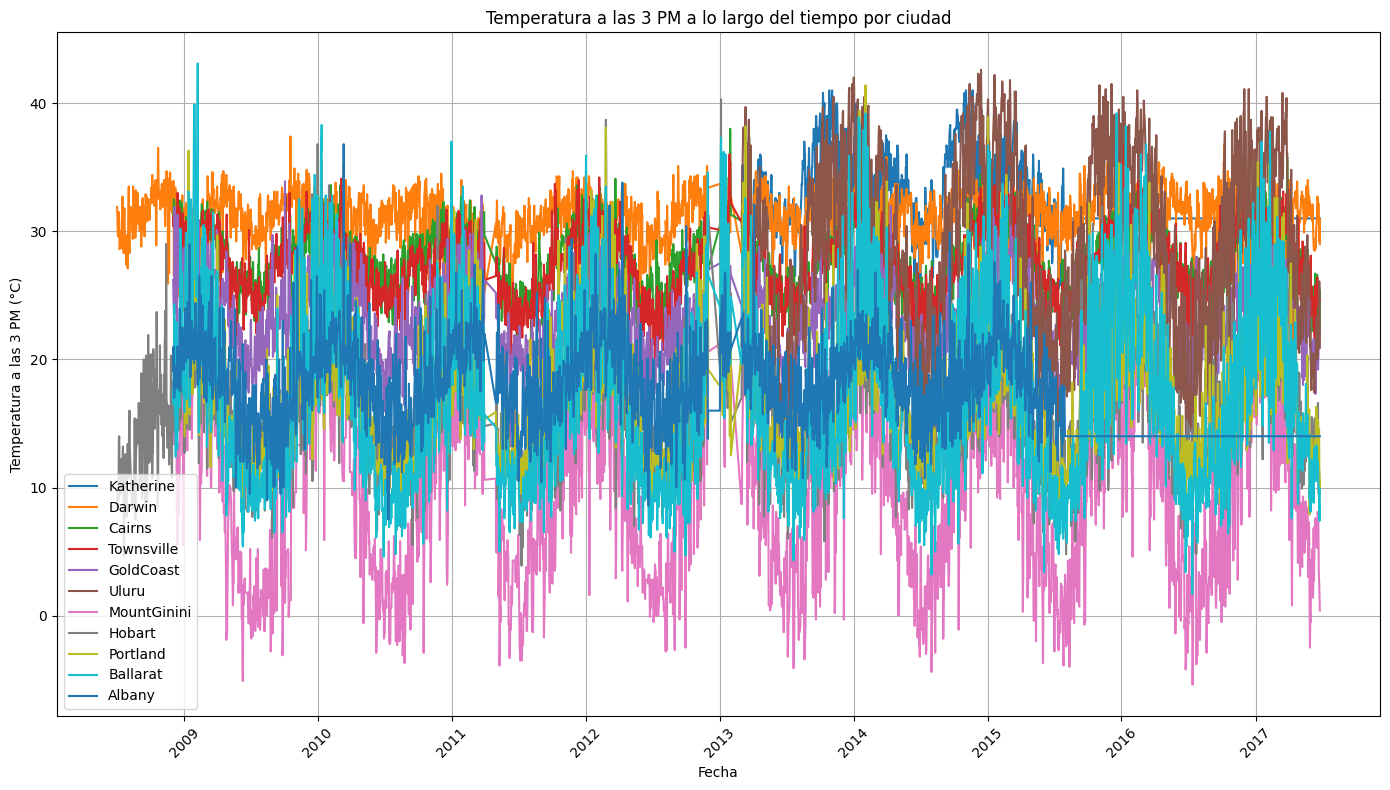

In [52]:
ciudades_objetivo = ['Katherine', 'Darwin', 'Cairns', 'Townsville', 'GoldCoast', 'Uluru', 'MountGinini','Hobart','Portland','Ballarat','Albany']

# Filtra el dataset para las ciudades de interés
df_filtrado = ordered_weather[ordered_weather['Location'].isin(ciudades_objetivo)]

# Asegúrate de que 'Date' esté en formato datetime
df_filtrado['Date'] = pd.to_datetime(df_filtrado['Date'])

# Selecciona la temperatura a las 3 PM y la fecha
df_temp_3pm = df_filtrado[['Date', 'Location', 'Temp3pm']]

# Configura la gráfica
plt.figure(figsize=(14, 8))

# Graficar la temperatura a las 3 PM a lo largo del tiempo para cada ciudad
for ciudad in ciudades_objetivo:
    df_ciudad = df_temp_3pm[df_temp_3pm['Location'] == ciudad]
    plt.plot(df_ciudad['Date'], df_ciudad['Temp3pm'], label=ciudad)

plt.xlabel('Fecha')
plt.ylabel('Temperatura a las 3 PM (°C)')
plt.title('Temperatura a las 3 PM a lo largo del tiempo por ciudad')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Se pueden observar patrones repetitivos a lo largo de los años para cada ciudad. Se observan ciclos de temperaturas altas y bajas. En base a esto se puede decir que existe estacionalidad en la temperatura a las 3 pm.

#### Realice el mismo proceso para la columna RainToday. ¿Se observa estacionalidad en la incidencia de lluvia?

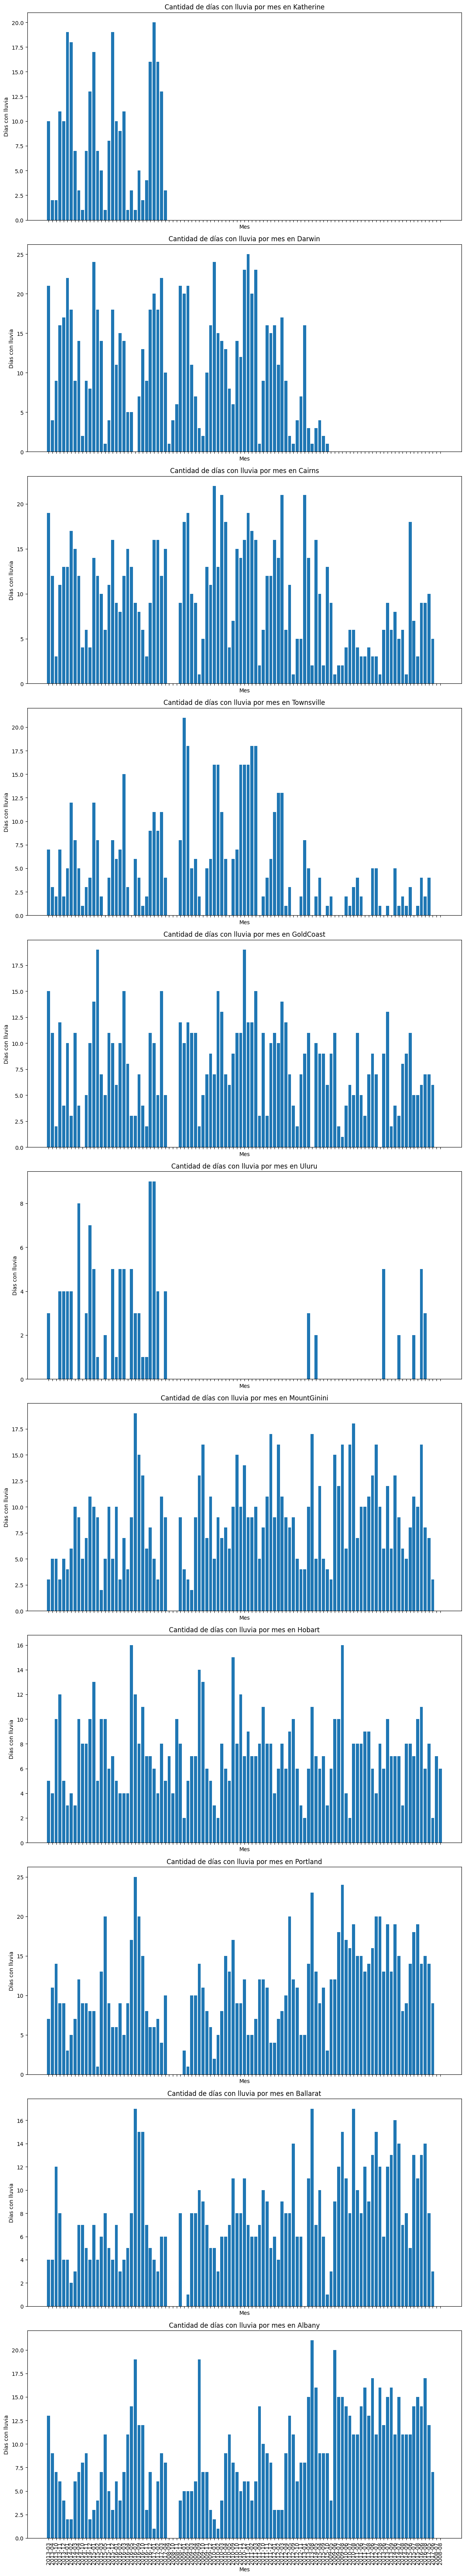

In [53]:
test_df = ordered_weather
# Extraer año y mes de la columna Date
test_df['YearMonth'] = test_df['Date'].dt.to_period('M')

# Filtrar los días con lluvia
rainy_days = test_df[test_df['RainToday'] == 1]

# Agrupar por Location y YearMonth, y contar los días con lluvia
rainy_days_count = rainy_days.groupby(['Location', 'YearMonth']).size().reset_index(name='RainyDays')

# Obtener lista de ciudades
cities = ciudades_objetivo

# Crear histogramas para cada ciudad
fig, axes = plt.subplots(len(cities), 1, figsize=(12, 6 * len(cities)), sharex=True)
for i, city in enumerate(cities):
    ax = axes[i] if len(cities) > 1 else axes
    city_data = rainy_days_count[rainy_days_count['Location'] == city]
    ax.bar(city_data['YearMonth'].astype(str), city_data['RainyDays'])
    ax.set_title(f'Cantidad de días con lluvia por mes en {city}')
    ax.set_xlabel('Mes')
    ax.set_ylabel('Días con lluvia')
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

No se pueden observar patrones claros en cuanto a la cantidad de dias por mes con lluvia para cada una de las ciudades. Por ende no se puede afirmar que exista estacionalidad.

#### Para la ciudad de Sydney, trace en un mismo gráfico todas las series temporales de temperatura entre los años 2012 y 2014.

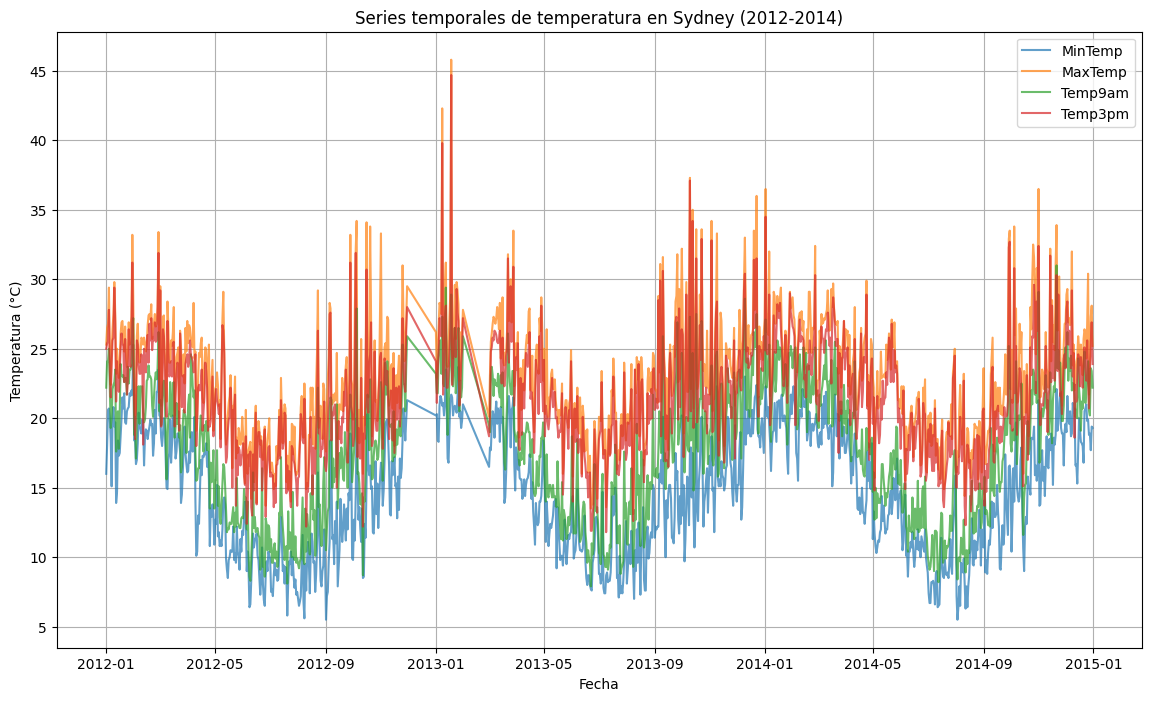

In [54]:
sydney_data = ordered_weather[(ordered_weather['Location'] == 'Sydney') & 
                           (ordered_weather['Date'].dt.year >= 2012) & 
                           (ordered_weather['Date'].dt.year <= 2014)]

# Graficar las series temporales de temperatura
plt.figure(figsize=(14, 8))
plt.plot(sydney_data['Date'], sydney_data['MinTemp'], label='MinTemp', alpha=0.7)
plt.plot(sydney_data['Date'], sydney_data['MaxTemp'], label='MaxTemp', alpha=0.7)
plt.plot(sydney_data['Date'], sydney_data['Temp9am'], label='Temp9am', alpha=0.7)
plt.plot(sydney_data['Date'], sydney_data['Temp3pm'], label='Temp3pm', alpha=0.7)
plt.title('Series temporales de temperatura en Sydney (2012-2014)')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

#### Para las ciudades del punto 1 del Análisis Exploratorio de Datos, genere un diagrama de caja comparativo para WindSpeed9am y otro para MaxTemp.

<Figure size 1200x600 with 0 Axes>

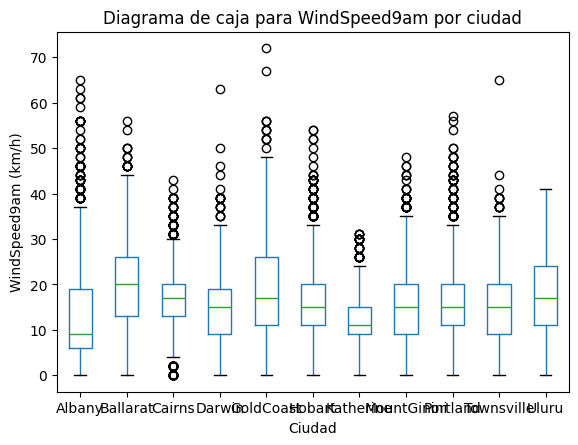

Text(0.5, 1.0, 'Diagrama de caja para MaxTemp')

<Figure size 1200x600 with 0 Axes>

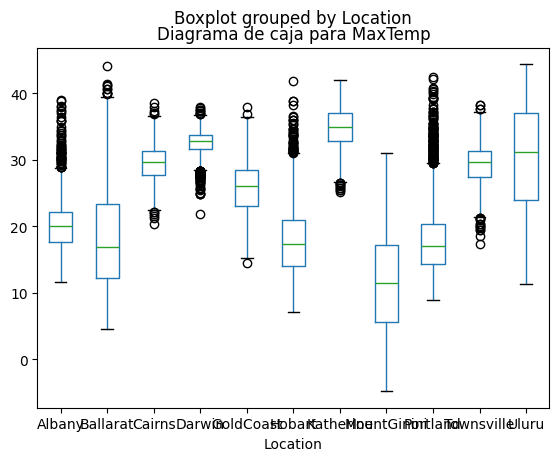

In [55]:
filtered_data = ordered_weather[ordered_weather['Location'].isin(ciudades_objetivo)]

# Crear el diagrama de caja para WindSpeed9am
plt.figure(figsize=(12, 6))
filtered_data.boxplot(column='WindSpeed9am', by='Location', grid=False)
plt.title('Diagrama de caja para WindSpeed9am por ciudad')
plt.suptitle('')
plt.xlabel('Ciudad')
plt.ylabel('WindSpeed9am (km/h)')
plt.show()

# Crear el diagrama de caja para MaxTemp
plt.figure(figsize=(12, 6))
filtered_data.boxplot(column='MaxTemp', by='Location', grid=False)
plt.title('Diagrama de caja para MaxTemp')

#### Para las ciudades del punto 3 y 4 del Análisis Exploratorio de Datos, cree un diagrama de barras que muestre la cantidad de Rainfall por año.

/var/folders/dq/71d8kdfn3yx09dksy7b8hzg40000gp/T/ipykernel_89851/2879656631.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year'] = filtered_data['Date'].dt.year


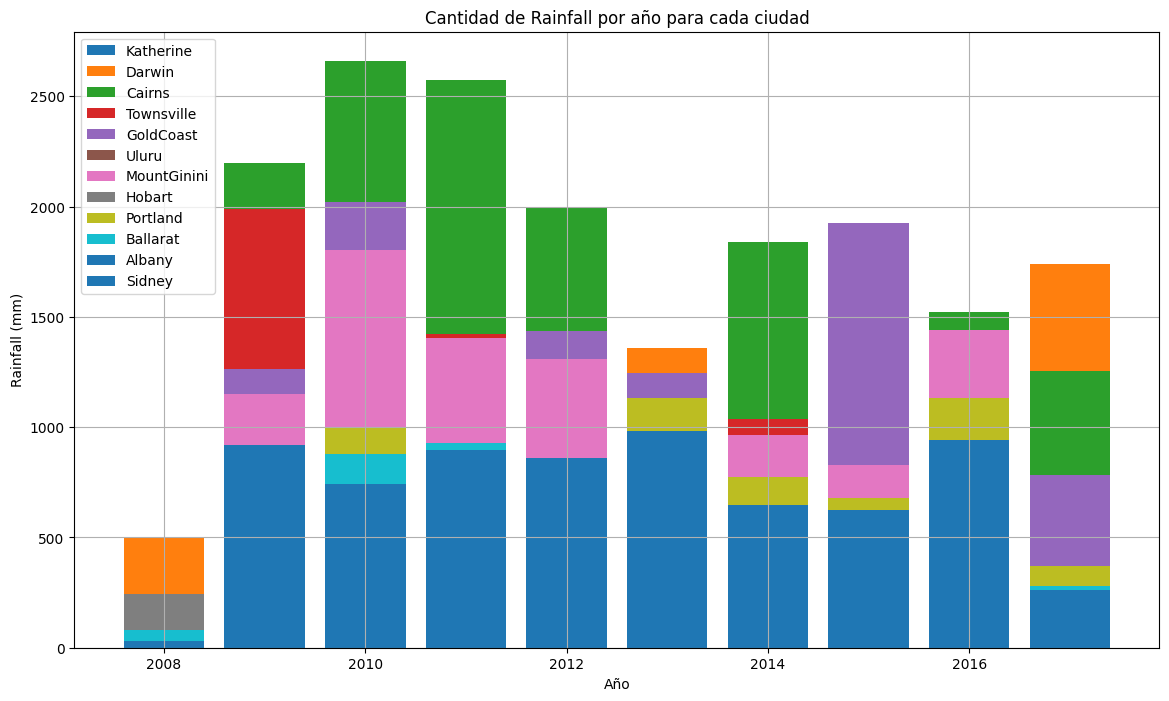

In [56]:

ciudades_objetivo =['Katherine', 'Darwin', 'Cairns', 'Townsville', 'GoldCoast', 'Uluru', 'MountGinini','Hobart','Portland','Ballarat','Albany', 'Sidney']
filtered_data = ordered_weather[ordered_weather['Location'].isin(ciudades_objetivo)]
filtered_data['Year'] = filtered_data['Date'].dt.year

# Agregar los datos para calcular la cantidad de Rainfall por año para cada ciudad
rainfall_per_year = filtered_data.groupby(['Location', 'Year'])['Rainfall'].sum().reset_index()
# rainfall_per_year.head(5)
# 

# Crear el diagrama de barras
plt.figure(figsize=(14, 8))
for city in ciudades_objetivo:
    city_data = rainfall_per_year[rainfall_per_year['Location'] == city]
    plt.bar(city_data['Year'], city_data['Rainfall'], label=city)

plt.title('Cantidad de Rainfall por año para cada ciudad')
plt.xlabel('Año')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()

#### Realice un gráfico de dispersión entre WindGustSpeed y Pressure9am para las ciudades del punto 1. Coloree los puntos según la variable RainToday.

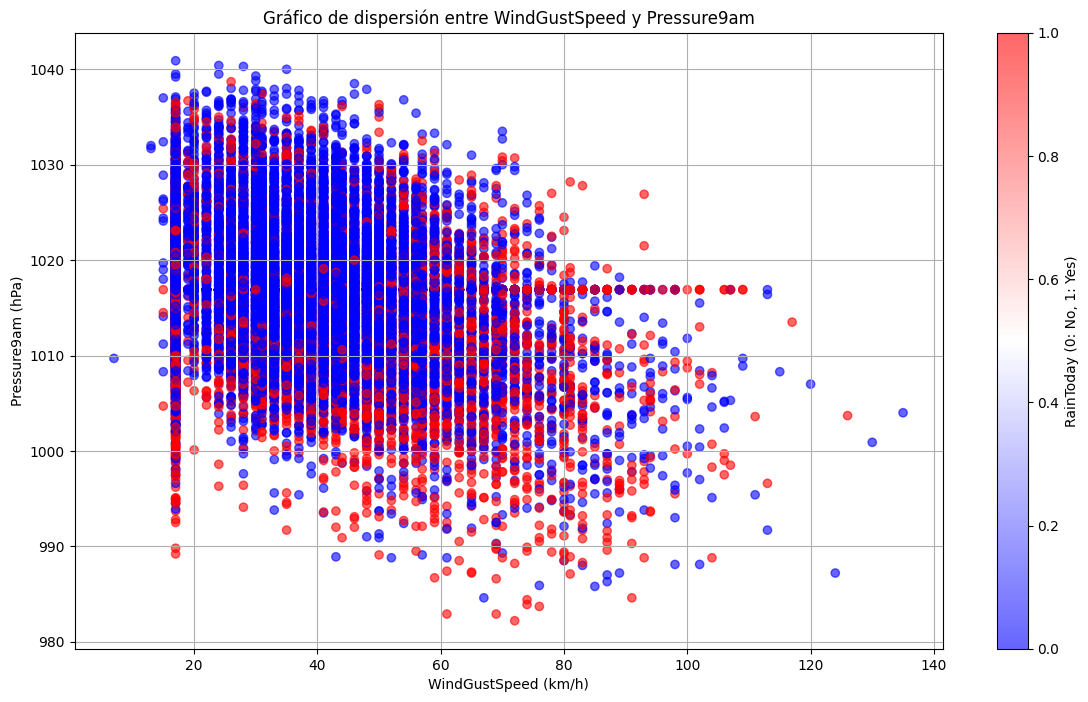

In [57]:
ciudades_objetivo = ['Katherine', 'Darwin', 'Cairns', 'Townsville', 'GoldCoast', 'Uluru', 'MountGinini','Hobart','Portland','Ballarat','Albany']
filtered_data = ordered_weather[ordered_weather['Location'].isin(ciudades_objetivo)]

# Crear el gráfico de dispersión
plt.figure(figsize=(14, 8))
scatter = plt.scatter(filtered_data['WindGustSpeed'], filtered_data['Pressure9am'], c=filtered_data['RainToday'], cmap='bwr', alpha=0.6)
plt.title('Gráfico de dispersión entre WindGustSpeed y Pressure9am')
plt.xlabel('WindGustSpeed (km/h)')
plt.ylabel('Pressure9am (hPa)')
plt.colorbar(scatter, label='RainToday (0: No, 1: Yes)')
plt.grid(True)
plt.show()

#### Realice un gráfico de dispersión entre MaxTemp y Humidity9am para las ciudades del punto 1. Coloree los puntos según la variable RainToday.

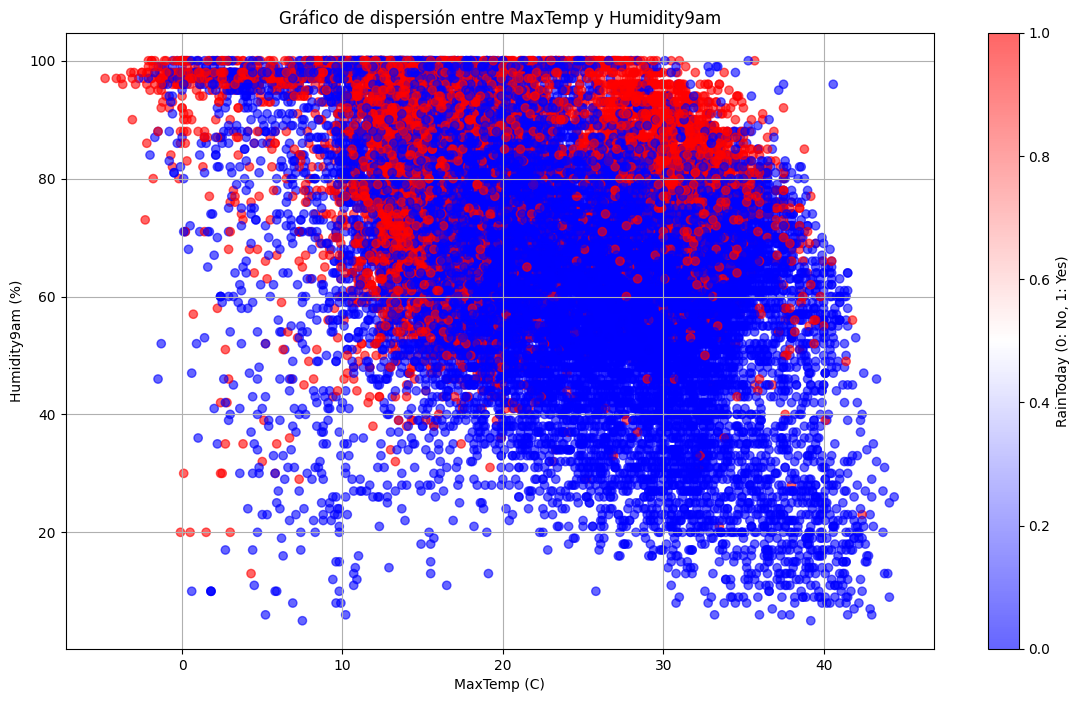

In [58]:
# Crear el gráfico de dispersión
plt.figure(figsize=(14, 8))
scatter = plt.scatter(filtered_data['MaxTemp'], filtered_data['Humidity9am'], c=filtered_data['RainToday'], cmap='bwr', alpha=0.6)
plt.title('Gráfico de dispersión entre MaxTemp y Humidity9am')
plt.xlabel('MaxTemp (C)')
plt.ylabel('Humidity9am (%)')
plt.colorbar(scatter, label='RainToday (0: No, 1: Yes)')
plt.grid(True)
plt.show()

### Conclusiones

#### Hallazgos relevantes
Se puede concluir que:
* A mayor temperatura, menor humedad.
* A mayor temperatura, y menor humedad, menor probabilidad de lluvia.
* Hay una fuerte vinculación entre Presión y Velocidad del Viento.
* Se observa una alta estacionalidad en los valores de temperaturas en las ciudades analizadas.
* No se observa una estacionalidad marcada respecto de la cantidad de días de lluvia por mes.

### Limpieza de dataset

In [61]:
file_path='./dataset/clean-dataset.csv'
weather_data_cleaned = ordered_weather.dropna(subset=['RainTomorrow'])
weather_data_cleaned.to_csv(file_path, index=False)

weather_data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 142146 entries, 96321 to 108569
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            142146 non-null  datetime64[ns]
 1   Location        142146 non-null  object        
 2   MinTemp         142146 non-null  float64       
 3   MaxTemp         142146 non-null  float64       
 4   Rainfall        142146 non-null  float64       
 5   Evaporation     142146 non-null  float64       
 6   Sunshine        142146 non-null  float64       
 7   WindGustDir     142146 non-null  object        
 8   WindGustSpeed   142146 non-null  float64       
 9   WindDir9am      142146 non-null  object        
 10  WindDir3pm      142146 non-null  object        
 11  WindSpeed9am    142146 non-null  float64       
 12  WindSpeed3pm    142146 non-null  float64       
 13  Humidity9am     142146 non-null  float64       
 14  Humidity3pm     142146 non-null  floa